# Install Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import VarianceThreshold,mutual_info_classif
from warnings import filterwarnings
filterwarnings('ignore')

# Problem Statement 

### To Predict the customer is loan defaultter or not

In [24]:
df=pd.read_csv('train.csv')
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [26]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [27]:
df.shape

(67463, 35)

# EDA

In [28]:
###1.Loan Amount


In [29]:
df['Loan Amount'].unique()

array([10000,  3609, 28276, ..., 30703, 17417,  8323], dtype=int64)

<AxesSubplot:xlabel='Loan Amount'>

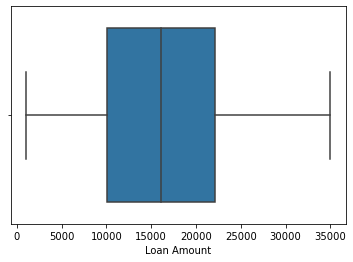

In [30]:
sns.boxplot(df['Loan Amount'])

<AxesSubplot:xlabel='Loan Amount', ylabel='Density'>

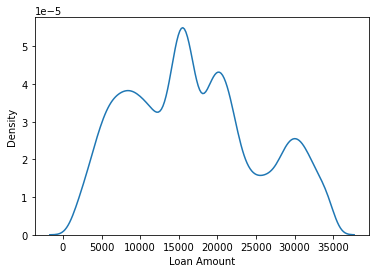

In [31]:
sns.kdeplot((df['Loan Amount']))

### 2.Funded Amount

In [32]:
df['Funded Amount'].unique()

array([32236, 11940,  9311, ..., 17672, 32921, 29875], dtype=int64)

<AxesSubplot:xlabel='Funded Amount'>

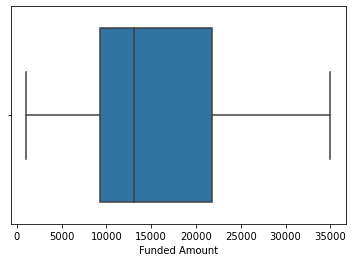

In [33]:
sns.boxplot(df['Funded Amount'])

<AxesSubplot:xlabel='Funded Amount', ylabel='Density'>

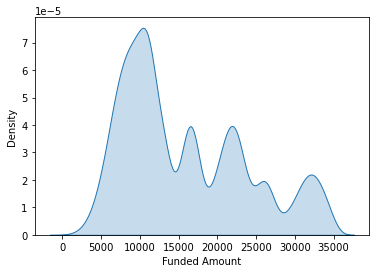

In [34]:
sns.kdeplot(df['Funded Amount'],fill=True)

In [35]:
### 3.Funded Amount Investor

<AxesSubplot:xlabel='Funded Amount Investor'>

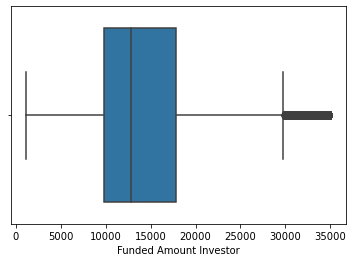

In [36]:
sns.boxplot(df['Funded Amount Investor'])

<AxesSubplot:xlabel='Funded Amount Investor', ylabel='Density'>

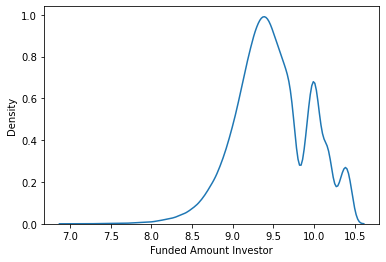

In [37]:
sns.kdeplot(np.log(df['Funded Amount Investor']))

In [38]:
def plot(data):
    print(sns.boxplot(data))
    print(sns.kdeplot(data,fill=True))

In [39]:
### 4.Term

In [40]:
df['Term'].unique()

array([59, 36, 58], dtype=int64)

In [41]:
df['Term']

0        59
1        59
2        59
3        59
4        59
         ..
67458    59
67459    59
67460    59
67461    59
67462    59
Name: Term, Length: 67463, dtype: int64

In [42]:
### 5.Batch Enrolled

In [43]:
df['Batch Enrolled'].unique()

array(['BAT2522922', 'BAT1586599', 'BAT2136391', 'BAT2428731',
       'BAT5341619', 'BAT4694572', 'BAT4808022', 'BAT2558388',
       'BAT2078974', 'BAT2252229', 'BAT2333412', 'BAT5849876',
       'BAT2833642', 'BAT2803411', 'BAT5525466', 'BAT5714674',
       'BAT2003848', 'BAT4722912', 'BAT3873588', 'BAT1780517',
       'BAT4271519', 'BAT5811547', 'BAT1184694', 'BAT4136152',
       'BAT3193689', 'BAT1467036', 'BAT2575549', 'BAT4351734',
       'BAT1104812', 'BAT5924421', 'BAT1930365', 'BAT1766061',
       'BAT5489674', 'BAT3865626', 'BAT5629144', 'BAT5547201',
       'BAT224923', 'BAT3726927', 'BAT3461431', 'BAT1761981',
       'BAT1135695'], dtype=object)

In [44]:
### 6.Interest Rate

In [45]:
df['Interest Rate']

0        11.135007
1        12.237563
2        12.545884
3        16.731201
4        15.008300
           ...    
67458     9.408858
67459     9.972104
67460    19.650943
67461    13.169095
67462    16.034631
Name: Interest Rate, Length: 67463, dtype: float64

<AxesSubplot:xlabel='Interest Rate'>

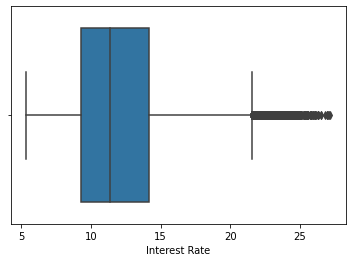

In [46]:
sns.boxplot(df['Interest Rate'])

<AxesSubplot:xlabel='Interest Rate', ylabel='Density'>

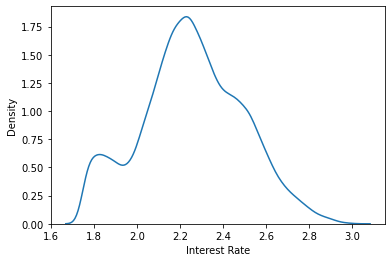

In [47]:
sns.kdeplot(np.cbrt(df['Interest Rate']))

In [84]:
normal(np.cbrt(df['Interest Rate']))

Pvalue 0.0
Data is not normally distributed


In [85]:
### 7.Grade

In [86]:
df['Grade'].unique()

array(['B', 'C', 'F', 'A', 'G', 'E', 'D'], dtype=object)

### 8.Sub Grade

In [87]:
df['Sub Grade'].unique()

array(['C4', 'D3', 'D4', 'C3', 'G5', 'C5', 'A5', 'C2', 'B5', 'B1', 'B4',
       'A4', 'B2', 'D2', 'C1', 'F3', 'D1', 'F2', 'A2', 'A3', 'F1', 'E5',
       'B3', 'F4', 'G1', 'F5', 'E1', 'E2', 'D5', 'G2', 'E4', 'A1', 'G3',
       'E3', 'G4'], dtype=object)

In [88]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [89]:
###10'Employment Duration'

In [90]:
df['Employment Duration'].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [91]:
#### 11. Home Ownership

In [92]:
df['Home Ownership'].unique()

array([176346.6267 ,  39833.921  ,  91506.69105, ...,  34813.96985,
        96938.83564, 105123.1558 ])

<AxesSubplot:xlabel='Home Ownership'>

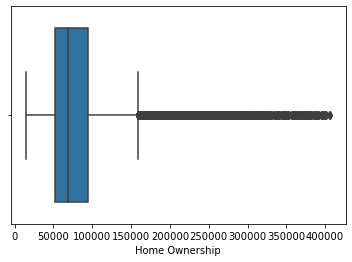

In [93]:
sns.boxplot(df['Home Ownership'])

<AxesSubplot:xlabel='Home Ownership', ylabel='Density'>

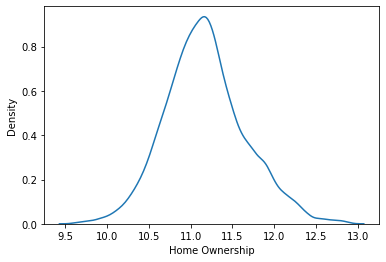

In [94]:
sns.kdeplot(np.log(df['Home Ownership']))

In [95]:
normal(np.log(df['Home Ownership']))

Pvalue 4.0637655465419695e-44
Data is not normally distributed


In [96]:
### 12. Verification Status

In [97]:
df['Verification Status']

0           Not Verified
1        Source Verified
2        Source Verified
3        Source Verified
4        Source Verified
              ...       
67458           Verified
67459    Source Verified
67460           Verified
67461       Not Verified
67462           Verified
Name: Verification Status, Length: 67463, dtype: object

In [98]:
### 13.Payment Plan

In [99]:
df['Payment Plan'].unique()

array(['n'], dtype=object)

In [100]:
### 14.Loan Title

In [101]:
df['Loan Title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

In [102]:
### 15.Debit to Income

In [103]:
df['Debit to Income'].unique()

array([16.28475781, 15.41240945, 28.13761862, ..., 10.29577356,
        7.61462376, 16.05211225])

<AxesSubplot:xlabel='Debit to Income'>

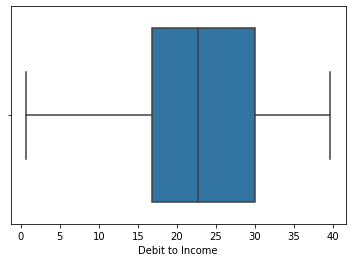

In [104]:
sns.boxplot(df['Debit to Income'])

<AxesSubplot:xlabel='Debit to Income', ylabel='Density'>

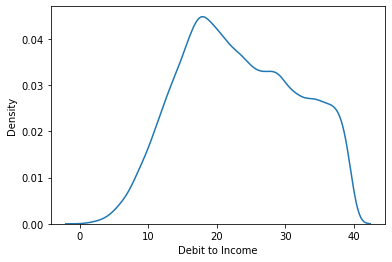

In [105]:
sns.kdeplot((df['Debit to Income']))

In [106]:
normal(df['Debit to Income'])

Pvalue 0.0
Data is not normally distributed


In [107]:
### 16.Delinquency - two years

In [108]:
df['Delinquency - two years'].unique()

array([1, 0, 3, 6, 2, 7, 5, 4, 8], dtype=int64)

In [109]:
### 17.Inquires - six months

In [110]:
df['Inquires - six months'].unique()

array([0, 3, 2, 1, 4, 5], dtype=int64)

In [111]:
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [112]:
### 18.Open Account

In [113]:
df['Open Account'].unique()

array([13, 12, 14,  7, 16, 11,  6, 17, 10,  8,  9, 26, 31, 28, 19, 15, 33,
       30, 21, 18, 27, 20, 25, 24, 23, 22, 34, 32, 29,  5,  4, 36, 35,  3,
       37,  2], dtype=int64)

<AxesSubplot:xlabel='Open Account', ylabel='Density'>

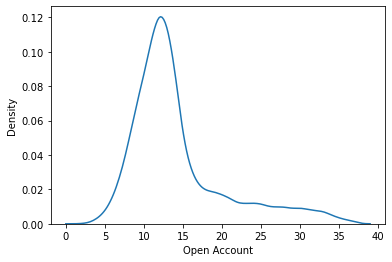

In [114]:
sns.kdeplot((df['Open Account']))

In [115]:
normal((df['Open Account']))

Pvalue 0.0
Data is not normally distributed


In [116]:
### 19.Public Record

In [117]:
df['Public Record'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [118]:
### 20.Revolving Balance

In [119]:
df['Revolving Balance'].unique()

array([24246,   812,  1843, ..., 18806, 29762, 27384], dtype=int64)

<AxesSubplot:xlabel='Revolving Balance'>

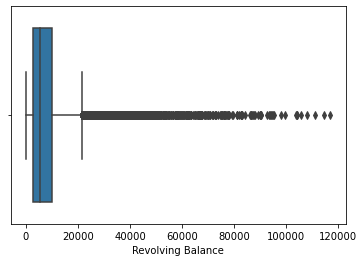

In [120]:
sns.boxplot((df['Revolving Balance']))

<AxesSubplot:xlabel='Revolving Balance', ylabel='Density'>

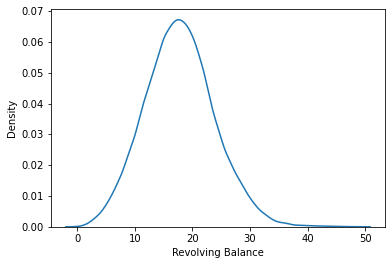

In [121]:
sns.kdeplot(np.cbrt(df['Revolving Balance']))

In [122]:
normal(np.cbrt(df['Revolving Balance']))

Pvalue 1.0148800431786128e-38
Data is not normally distributed


In [123]:
### 21.Revolving Utilities

In [124]:
df['Revolving Utilities'].unique()

array([74.93255103, 78.29718601,  2.07303987, ...,  1.50009028,
       68.4818825 , 81.69232835])

<AxesSubplot:xlabel='Revolving Utilities'>

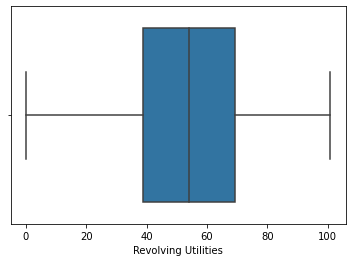

In [125]:
sns.boxplot(df['Revolving Utilities'])

<AxesSubplot:xlabel='Revolving Utilities', ylabel='Density'>

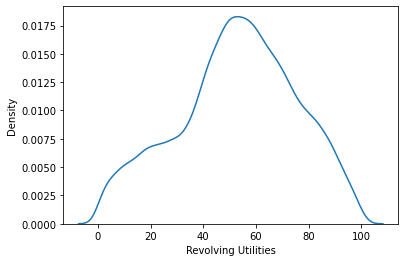

In [126]:
sns.kdeplot(df['Revolving Utilities'])

In [127]:
###22.Total Accounts

In [128]:
df['Total Accounts'].unique()

array([ 7, 13, 20, 12, 22, 37, 33, 17, 30, 46, 21, 19, 10, 16, 14,  9, 25,
       11, 24, 23, 15, 18, 28,  8, 38, 27, 29,  6, 26,  4,  5, 32, 56, 44,
       31, 34, 40, 39, 45, 36, 41, 35, 42, 50, 52, 43, 63, 47, 66, 48, 49,
       54, 68, 53, 55, 65, 51, 60, 61, 59, 57, 64, 72, 58, 71, 67, 69, 70,
       62], dtype=int64)

<AxesSubplot:xlabel='Total Accounts'>

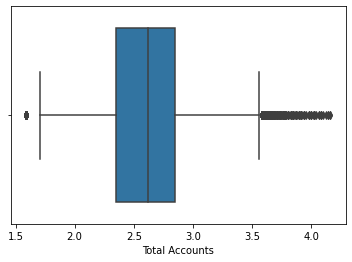

In [129]:
sns.boxplot(np.cbrt(df['Total Accounts']))

<AxesSubplot:xlabel='Total Accounts', ylabel='Density'>

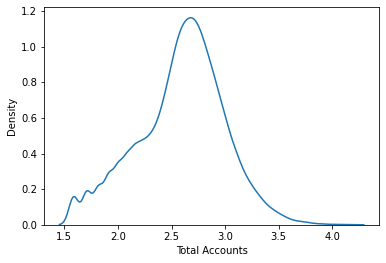

In [130]:
sns.kdeplot(np.cbrt(df['Total Accounts']))

In [131]:
from scipy.stats import shapiro


In [132]:
def normal(data):
    t,p=shapiro(data)
    print('Pvalue',p)
    if p>0.05:
        print('Data is normally distirbuted')
    else:
        print('Data is not normally distributed')

In [133]:
normal(np.cbrt(df['Total Accounts']))

Pvalue 0.0
Data is not normally distributed


In [134]:
### 23.Initial List Status

In [135]:
df['Initial List Status'].unique()

array(['w', 'f'], dtype=object)

In [136]:
### 24.Total Received Interest

In [137]:
df['Total Received Interest'].unique()

array([2929.646315 ,  772.769385 ,  863.3243956, ..., 2691.995532 ,
       3659.334202 , 1324.255922 ])

<AxesSubplot:xlabel='Total Received Interest'>

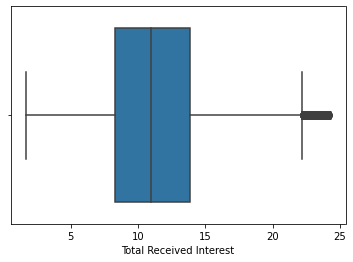

In [138]:
sns.boxplot(np.cbrt(df['Total Received Interest']))

<AxesSubplot:xlabel='Total Received Interest', ylabel='Density'>

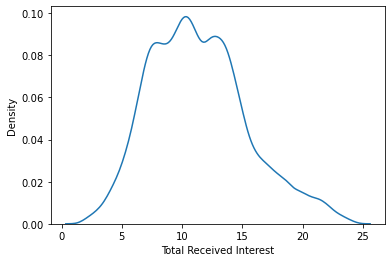

In [139]:
sns.kdeplot(np.cbrt(df['Total Received Interest']))

In [140]:
normal(np.cbrt(df['Total Received Interest']))

Pvalue 0.0
Data is not normally distributed


In [141]:
### 25.Total Received Late Fee

In [142]:
df['Total Received Late Fee'].unique()

array([1.02055198e-01, 3.61811700e-02, 1.87786601e+01, ...,
       2.82115230e-02, 7.45083190e-02, 6.70556000e-04])

<AxesSubplot:xlabel='Total Received Late Fee'>

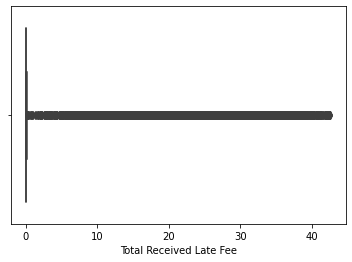

In [143]:
sns.boxplot((df['Total Received Late Fee']))

<AxesSubplot:xlabel='Total Received Late Fee', ylabel='Density'>

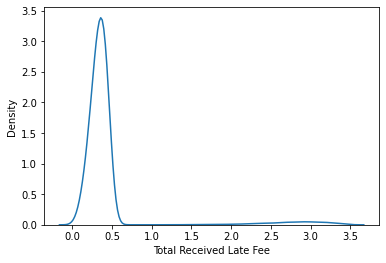

In [144]:
sns.kdeplot(np.cbrt(df['Total Received Late Fee']))

In [145]:
normal(np.cbrt(df['Total Received Late Fee']))

Pvalue 0.0
Data is not normally distributed


In [146]:
### 26.Recoveries

In [147]:
df['Recoveries'].unique()

array([2.49829096, 2.37721476, 4.31627734, ..., 5.67309165, 1.15745391,
       1.85647963])

<AxesSubplot:xlabel='Recoveries'>

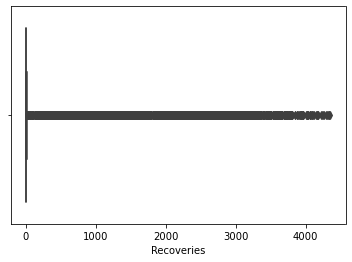

In [148]:
sns.boxplot((df['Recoveries']))

<AxesSubplot:xlabel='Recoveries', ylabel='Density'>

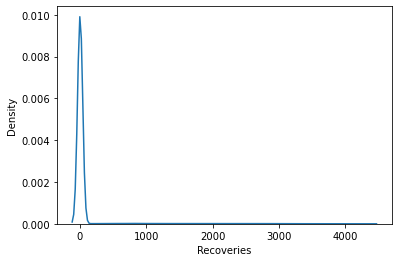

In [149]:
sns.kdeplot(df['Recoveries'])

In [150]:
### 27.Collection Recovery Fee

In [151]:
df['Collection Recovery Fee'].unique()

array([0.79372376, 0.9748211 , 1.02007495, ..., 1.60709263, 0.20760821,
       0.3663859 ])

<AxesSubplot:xlabel='Collection Recovery Fee'>

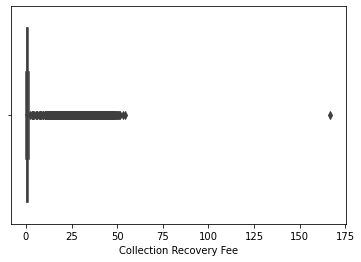

In [152]:
sns.boxplot(df['Collection Recovery Fee'])

<AxesSubplot:xlabel='Collection Recovery Fee', ylabel='Density'>

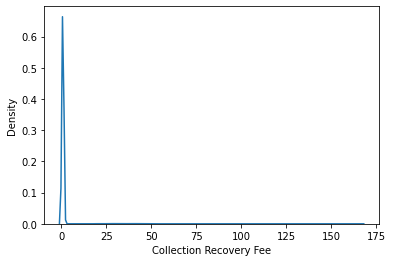

In [153]:
sns.kdeplot(df['Collection Recovery Fee'])

In [154]:
### 28.Collection 12 months Medical

In [155]:
df['Collection 12 months Medical'].unique()

array([0, 1], dtype=int64)

In [156]:
### 29.Application Type

In [157]:
df['Application Type'].unique()


array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [158]:
df['Application Type'].replace({'INDIVIDUAL':0,'JOINT':1},inplace=True)

In [159]:
### 30.Last week Pay

In [160]:
df['Last week Pay'].unique()

array([ 49, 109,  66,  39,  18,  32,  71,  87, 144,   9,  34,  55, 120,
        72,  83, 126, 128,  76, 151,  33,  97,  88, 103,   1,  77,   2,
        69,  54,  13,   3,  16, 154,  67,  82,  90,  28, 139,  98,  50,
        14,   6,  42,  65, 118, 157, 161, 137, 155, 122,  57, 152, 131,
        51, 119,  37, 125,  96,   4,  41, 140,  53, 153,  74,  60,  93,
       117, 145,  95, 106,  17,  36, 156,  22, 130,  64,  43, 110,   8,
       101, 138,  59,  91,   0, 147, 159,  21, 123,  61,   7,  40,  12,
        56, 102, 160, 108,  47,  86,  70,  80,  58,  99,  25,  29, 112,
       107, 150, 132,  23, 149,  19,  85,  63,  27,  73,  38,  31,  44,
        92,  89,  94,  45, 133, 104, 127, 115, 113, 135, 142,  68,  30,
       121, 116, 148,   5,  35,  48,  78, 124,  79,  46,  81,  11, 141,
       129, 143,  52, 105,  20, 114,  62,  15, 146, 134, 111,  10, 100,
        84,  26, 158,  24,  75, 136], dtype=int64)

<AxesSubplot:xlabel='Last week Pay'>

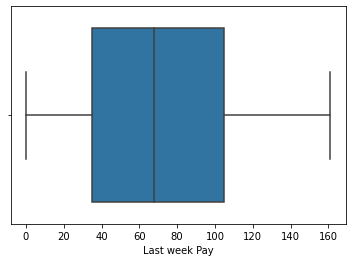

In [161]:
sns.boxplot((df['Last week Pay']))

<AxesSubplot:xlabel='Last week Pay', ylabel='Density'>

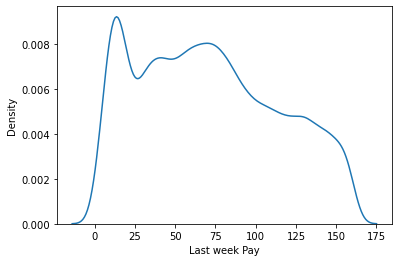

In [162]:
sns.kdeplot((df['Last week Pay']))

In [163]:
normal(df['Last week Pay'])

Pvalue 0.0
Data is not normally distributed


In [164]:
### 31.Accounts Delinquent

In [165]:
df['Accounts Delinquent'].unique()

array([0], dtype=int64)

In [166]:
df['Accounts Delinquent']

0        0
1        0
2        0
3        0
4        0
        ..
67458    0
67459    0
67460    0
67461    0
67462    0
Name: Accounts Delinquent, Length: 67463, dtype: int64

In [167]:
###32.Total Collection Amount

In [168]:
df['Total Collection Amount'].unique()

array([  31,   53,   34, ..., 9920, 1902, 5302], dtype=int64)

<AxesSubplot:xlabel='Total Collection Amount'>

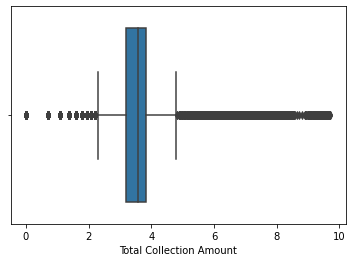

In [169]:
sns.boxplot(np.log(df['Total Collection Amount']))

<AxesSubplot:xlabel='Total Collection Amount', ylabel='Density'>

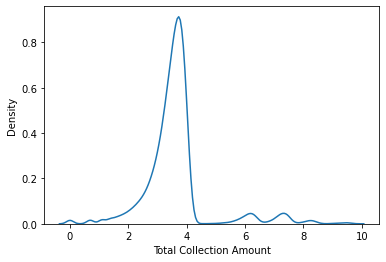

In [170]:
sns.kdeplot(np.log(df['Total Collection Amount']))

In [171]:
normal(np.log(df['Total Collection Amount']))

Pvalue 0.0
Data is not normally distributed


In [172]:
### 33.Total Current Balance

In [173]:
df['Total Current Balance'].unique()

array([311301, 182610,  89801, ..., 176857, 361339, 196960], dtype=int64)

<AxesSubplot:xlabel='Total Current Balance'>

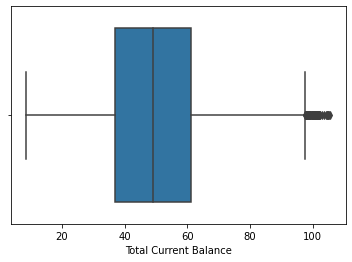

In [174]:
sns.boxplot(np.cbrt(df['Total Current Balance']))

<AxesSubplot:xlabel='Total Current Balance', ylabel='Density'>

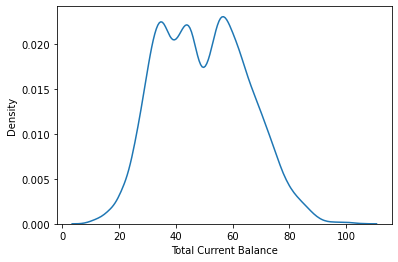

In [175]:
sns.kdeplot(np.cbrt(df['Total Current Balance']))

In [176]:
normal(np.cbrt(df['Total Current Balance']))

Pvalue 0.0
Data is not normally distributed


In [177]:
### 34.Total Revolving Credit Limit 

In [178]:
df['Total Revolving Credit Limit'].unique()

array([ 6619, 20885, 26155, ..., 42330, 39075, 66060], dtype=int64)

<AxesSubplot:xlabel='Total Revolving Credit Limit'>

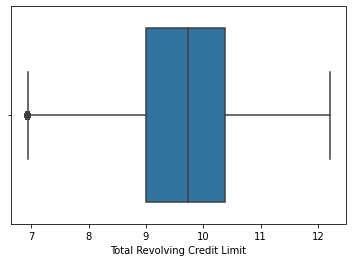

In [179]:
sns.boxplot(np.log(df['Total Revolving Credit Limit']))

<AxesSubplot:xlabel='Total Revolving Credit Limit', ylabel='Density'>

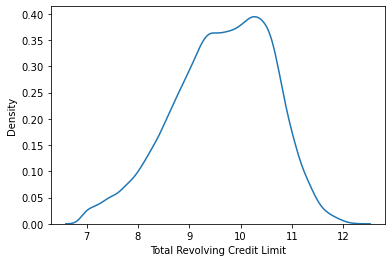

In [180]:
sns.kdeplot(np.log(df['Total Revolving Credit Limit']))

In [181]:
normal(np.log(df['Total Revolving Credit Limit']))

Pvalue 0.0
Data is not normally distributed


In [182]:
### 35.Loan Status

In [183]:
df['Loan Status'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

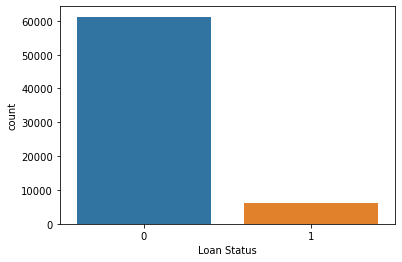

In [184]:
sns.countplot(df['Loan Status'])

# Feature Enginerring

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [188]:
df['Batch Enrolled']

0        BAT2522922
1        BAT1586599
2        BAT2136391
3        BAT2428731
4        BAT5341619
            ...    
67458    BAT3193689
67459    BAT1780517
67460    BAT1761981
67461    BAT2333412
67462    BAT1930365
Name: Batch Enrolled, Length: 67463, dtype: object

In [189]:
df['Grade']

0        B
1        C
2        F
3        C
4        C
        ..
67458    C
67459    C
67460    A
67461    D
67462    B
Name: Grade, Length: 67463, dtype: object

In [190]:
df.drop('ID',axis=1,inplace=True)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Batch Enrolled                67463 non-null  object 
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Sub Grade                     67463 non-null  object 
 8   Employment Duration           67463 non-null  object 
 9   Home Ownership                67463 non-null  float64
 10  Verification Status           67463 non-null  object 
 11  Payment Plan                  67463 non-null  object 
 12  Loan Title                    67463 non-null  object 
 13  D

In [197]:
df.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [215]:
x=df.drop(['Loan Status','Batch Enrolled','Grade','Sub Grade','Employment Duration',
           'Home Ownership','Initial List Status','Verification Status','Payment Plan','Loan Title'],axis=1)
y=df['Loan Status']

In [216]:
from sklearn.feature_selection import mutual_info_classif

<AxesSubplot:>

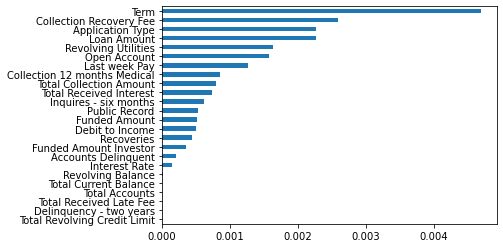

In [217]:
arr=mutual_info_classif(x,y)
s1=pd.Series(arr,index=x.columns)
s1.sort_values().plot(kind='barh')

In [218]:
from skfeature.function.similarity_based import fisher_score

In [219]:
array = fisher_score.fisher_score(x.values,y)

s1 = pd.Series(array, index = x.columns)
s1.sort_values().plot(kind = 'barh')

MemoryError: Unable to allocate 55.9 GiB for an array with shape (3748133284, 2) and data type int64

In [207]:
from sklearn.datasets import load_wine
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
sfs = SequentialFeatureSelector(log_clf, direction='forward')
sfs.fit(x,y)

array = sfs.get_support()
s1 = pd.Series(array,index=x.columns)
s1

Loan Amount                      True
Funded Amount                    True
Funded Amount Investor           True
Term                             True
Interest Rate                    True
Debit to Income                  True
Delinquency - two years          True
Inquires - six months            True
Open Account                     True
Public Record                    True
Revolving Balance                True
Revolving Utilities              True
Total Accounts                  False
Total Received Interest         False
Total Received Late Fee         False
Recoveries                      False
Collection Recovery Fee         False
Collection 12 months Medical    False
Application Type                False
Last week Pay                   False
Accounts Delinquent             False
Total Collection Amount         False
Total Current Balance           False
Total Revolving Credit Limit    False
dtype: bool

In [220]:
x_new=x.drop(['Total Accounts','Total Received Interest','Total Received Late Fee','Recoveries','Collection Recovery Fee',
              'Collection 12 months Medical','Application Type','Last week Pay','Accounts Delinquent',
               'Total Collection Amount','Total Current Balance','Total Revolving Credit Limit'
              ],axis=1)

In [221]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=42,stratify=y)

In [222]:
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [223]:
### Testing Model EValuation
y_pred=lgr.predict(x_test)
acc=accuracy_score(y_test,y_pred)

In [224]:
acc

0.9075062255425116

In [225]:
y_pred=lgr.predict(x_train)

In [227]:
acc=accuracy_score(y_train,y_pred)


In [228]:
acc

0.907484633476293